In [2]:
# Trying to read huge EIA Electricity file

# import json

# data_path = "data/ELEC.ndjson"

# parsed_data = []

# with open(data_path, 'r') as file:
#     for line in file:
#         # print(line)
#         # Remove leading/trailing whitespaces and parse each line as JSON
#         for l in line:
#             data_object = json.loads(line.strip())
#             parsed_data.append(data_object)
#         break

here are the sales examples. Columns:

Month: gives you the month of the year. From 03.2018 to 11.2022
All other columns: your products sales, containing Region - Brand - Product information.

Eg. column: Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
Split column name with strsplit(" - ") and you get:
Дальневосточный ФО  -> geographical region
AGALATES -> molecule
Agalates tabs 0.5 mg #2 -> concrete product

So if the goal is to build a hierarchy, we can build it:
Leaves: products
Parents: molecules
Parents of parents: regions

:*

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
df = pd.read_excel('data/Quarterly_smoothing.xlsx', index_col=0)

In [14]:
df = df.iloc[:, :20]

print("Shape", df.shape)
df.head()

Shape (57, 20)


,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Month,,,,,,,,,,,,,,,,,,,,
2018-03-01,200,0,0,9,0,0,0,948,35,87,79,0,0,0,0,0,1038,0,1150,1081
2018-04-01,1000,0,0,9,0,0,0,1036,35,87,79,0,0,0,0,0,3219,1903,1550,9207
2018-05-01,1731,0,0,301,0,0,0,1245,93,147,18,19,0,0,0,0,4522,2220,1700,10998
2018-06-01,2090,0,0,490,0,0,0,1786,183,103,72,19,4,100,0,0,5125,2250,1050,25764
2018-07-01,1547,0,60,490,0,0,0,4131,183,103,72,19,24,100,0,0,3633,377,650,20549


### Plot signal of all drugs over time - see patterns

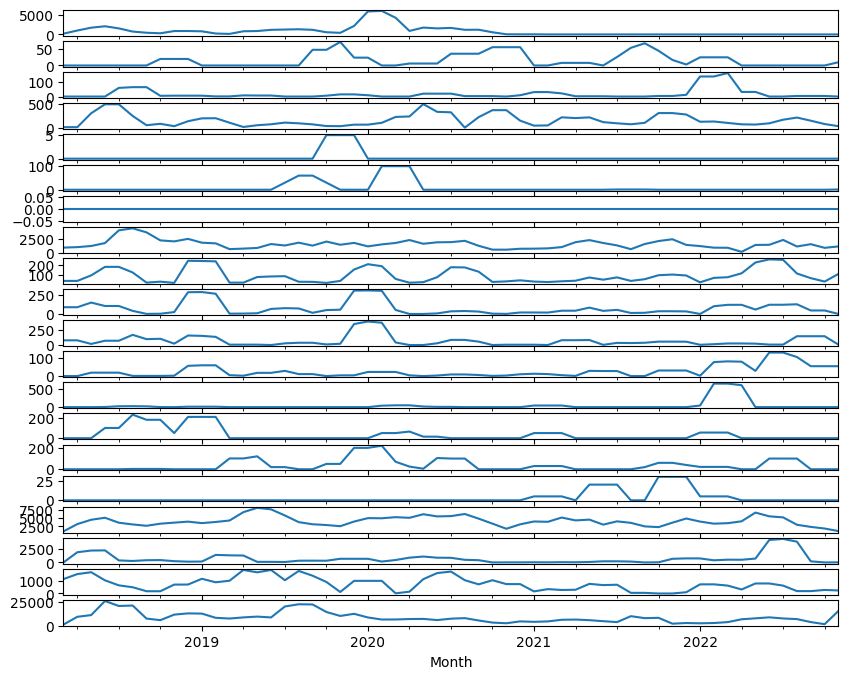

In [15]:
fig, axes = plt.subplots(len(df.columns), 1, figsize=(10, 8), sharex=True)
for i, column in enumerate(df.columns):
    df[column].plot(ax=axes[i])
    # axes[i].set_title(column)
    # axes[i].set_ylabel('Value')

In [18]:
correlation_results_w_lag = df.corr()
correlation_results_w_lag.head(5)

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,1.000000,-0.109353,-0.154337,0.102190,0.045741,0.523890,NaN,0.106018,0.279303,0.493383,0.617476,-0.188798,-0.122880,0.030896,0.586774,-0.256264,0.323436,-0.014880,0.310582,0.240708
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,-0.109353,1.000000,0.005038,-0.017640,0.369342,-0.085731,NaN,-0.162789,-0.208054,-0.200239,-0.112437,-0.293043,-0.012984,-0.228964,-0.040836,0.024808,-0.316324,-0.283012,-0.154895,-0.078391
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,-0.154337,0.005038,1.000000,-0.009920,-0.036536,-0.169566,NaN,0.075201,-0.084079,-0.037326,-0.096670,0.129383,0.689970,0.254283,-0.100433,0.012317,-0.072202,-0.096535,-0.095227,-0.143120
Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,0.102190,-0.017640,-0.009920,1.000000,-0.214516,-0.032268,NaN,0.285173,0.149354,-0.056045,-0.073096,-0.044800,-0.093372,0.129330,-0.144362,0.180760,0.080991,0.141813,-0.007888,0.105267
Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,0.045741,0.369342,-0.036536,-0.214516,1.000000,0.014373,NaN,0.053428,-0.070780,0.178489,0.164061,-0.170777,-0.069619,-0.129098,0.270583,-0.095238,-0.152848,-0.029590,-0.033524,0.156816


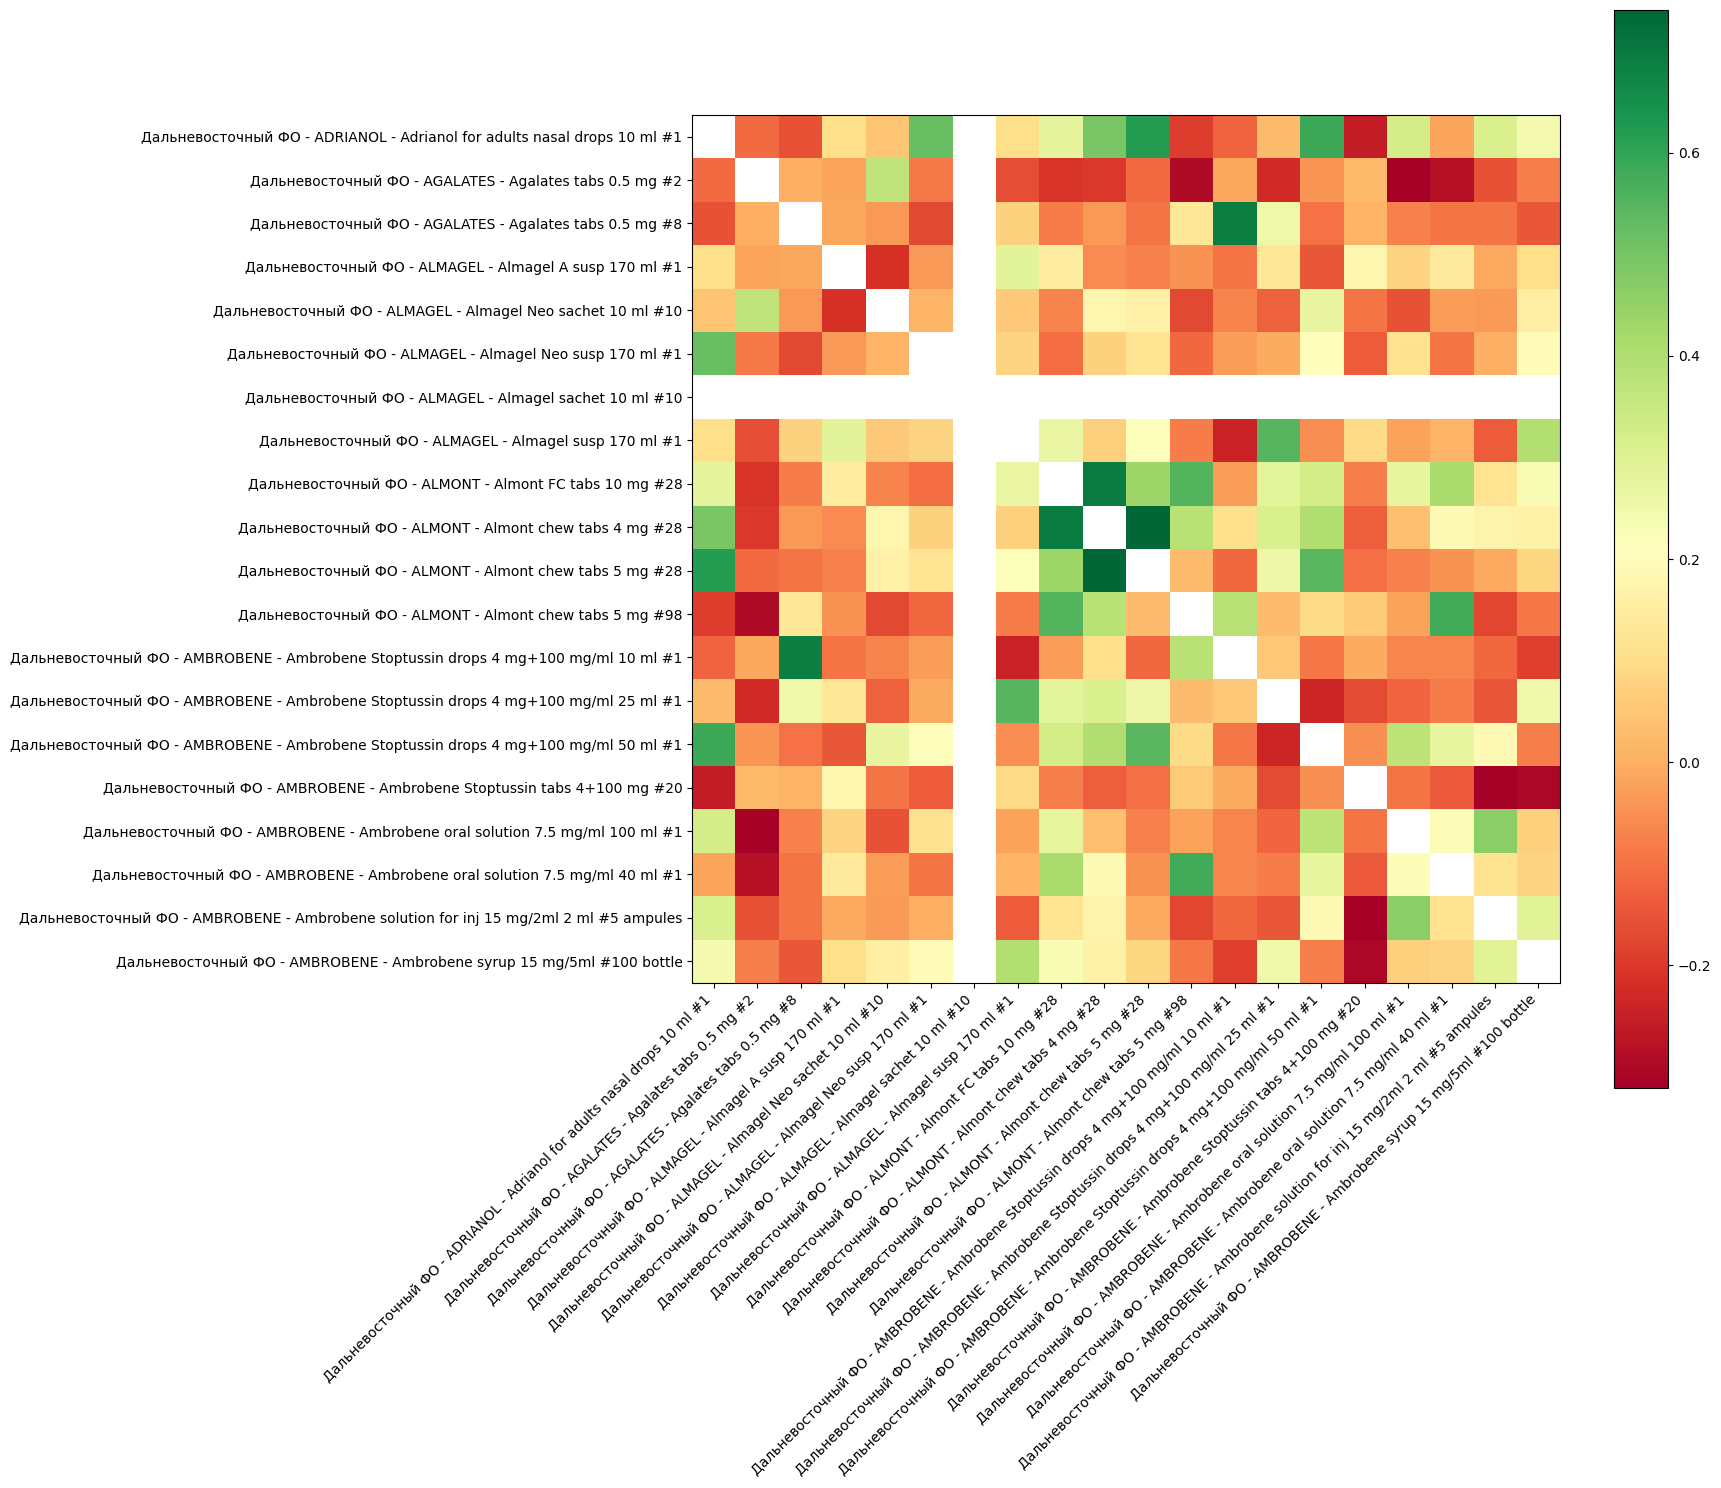

In [24]:
plt.figure(figsize=(14, 14))

plt.imshow(correlation_results_w_lag, cmap='RdYlGn')#, interpolation='nearest')

num_columns = len(df.columns)
plt.xticks(range(num_columns), df.columns, rotation=45, ha='right')
plt.yticks(range(num_columns), df.columns)

# Add a colorbar for reference
plt.colorbar()

In [23]:
# Find the maximum correlation for each column, ignoring NaN in the diagonal
max_correlations = correlation_results_w_lag.max().dropna()

# Print the results
for column, max_corr in max_correlations.items():
    other_column = correlation_results_w_lag[column].idxmax()
    print(f"The maximum correlation for {column} is {max_corr:.2f} with {other_column}")


The maximum correlation for Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1 is 0.62 with Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2 is 0.37 with Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10
The maximum correlation for Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8 is 0.69 with Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1 is 0.29 with Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10 is 0.37 with Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2
The maximum correlation for Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1 is 0.52 with Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1
The maximum 

### With Lag Period

In [27]:
# Set the maximum lag level you want to consider
max_lag = 6

# Create an empty DataFrame to store the correlation results
correlation_results_w_lag = pd.DataFrame(index=df.columns, columns=df.columns)

# Calculate correlations for each pair of time series at different lag levels
for col1 in df.columns:
    for col2 in df.columns:
        max_corr = -1
        max_lag_value = 0
        
        for lag in range(0, max_lag + 1):
            # Shift the second time series by the current lag
            shifted_series = df[col2].shift(lag)
            
            # Combine the two time series into a single DataFrame
            combined_df = pd.concat([df[col1], shifted_series], axis=1).dropna()
            
            # Calculate correlation between the two time series
            corr_matrix = np.corrcoef(combined_df.iloc[:, 0], combined_df.iloc[:, 1])
            corr = corr_matrix[0, 1]
            
            # Update max correlation and lag if a higher correlation is found
            if corr > max_corr:
                max_corr = corr
                max_lag_value = lag
        
        correlation_results_w_lag.loc[col1, col2] = f'{max_corr:.2f} (at lag {max_lag_value})'

correlation_results_w_lag


/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ariellubonja/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered i

,Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,Дальневосточный ФО - ALMAGEL - Almagel susp 170 ml #1,Дальневосточный ФО - ALMONT - Almont FC tabs 10 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 4 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #28,Дальневосточный ФО - ALMONT - Almont chew tabs 5 mg #98,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 10 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 25 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin drops 4 mg+100 mg/ml 50 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene Stoptussin tabs 4+100 mg #20,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 100 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene oral solution 7.5 mg/ml 40 ml #1,Дальневосточный ФО - AMBROBENE - Ambrobene solution for inj 15 mg/2ml 2 ml #5 ampules,Дальневосточный ФО - AMBROBENE - Ambrobene syrup 15 mg/5ml #100 bottle
Дальневосточный ФО - ADRIANOL - Adrianol for adults nasal drops 10 ml #1,1.00 (at lag 0),0.22 (at lag 3),-0.14 (at lag 2),0.10 (at lag 0),0.86 (at lag 3),0.55 (at lag 5),-1.00 (at lag 0),0.11 (at lag 0),0.28 (at lag 0),0.55 (at lag 1),0.68 (at lag 1),0.01 (at lag 6),-0.12 (at lag 0),0.03 (at lag 0),0.67 (at lag 1),-0.25 (at lag 5),0.32 (at lag 0),0.03 (at lag 1),0.37 (at lag 6),0.65 (at lag 6)
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #2,0.22 (at lag 6),1.00 (at lag 0),0.01 (at lag 0),0.28 (at lag 5),0.37 (at lag 0),0.19 (at lag 6),-1.00 (at lag 0),0.28 (at lag 3),-0.06 (at lag 4),-0.17 (at lag 6),-0.07 (at lag 6),-0.17 (at lag 4),-0.01 (at lag 0),-0.21 (at lag 2),0.33 (at lag 6),0.30 (at lag 3),0.55 (at lag 5),0.09 (at lag 6),0.27 (at lag 5),0.14 (at lag 4)
Дальневосточный ФО - AGALATES - Agalates tabs 0.5 mg #8,-0.07 (at lag 4),0.42 (at lag 6),1.00 (at lag 0),0.37 (at lag 3),-0.03 (at lag 6),-0.01 (at lag 3),-1.00 (at lag 0),0.08 (at lag 0),-0.03 (at lag 3),-0.04 (at lag 0),0.04 (at lag 5),0.13 (at lag 0),0.69 (at lag 0),0.25 (at lag 0),-0.00 (at lag 5),0.69 (at lag 3),-0.05 (at lag 1),0.06 (at lag 2),-0.10 (at lag 0),-0.05 (at lag 1)
Дальневосточный ФО - ALMAGEL - Almagel A susp 170 ml #1,0.40 (at lag 4),0.30 (at lag 6),0.08 (at lag 5),1.00 (at lag 0),0.48 (at lag 6),0.28 (at lag 3),-1.00 (at lag 0),0.29 (at lag 0),0.15 (at lag 0),0.23 (at lag 5),0.40 (at lag 5),-0.04 (at lag 0),0.06 (at lag 5),0.13 (at lag 0),0.34 (at lag 4),0.18 (at lag 0),0.16 (at lag 1),0.24 (at lag 1),0.02 (at lag 5),0.11 (at lag 0)
Дальневосточный ФО - ALMAGEL - Almagel Neo sachet 10 ml #10,0.08 (at lag 3),0.46 (at lag 1),-0.04 (at lag 0),-0.14 (at lag 4),1.00 (at lag 0),0.39 (at lag 2),-1.00 (at lag 0),0.05 (at lag 0),-0.02 (at lag 5),0.18 (at lag 0),0.16 (at lag 0),0.01 (at lag 5),-0.07 (at lag 0),-0.13 (at lag 0),0.27 (at lag 0),-0.10 (at lag 0),0.59 (at lag 6),-0.01 (at lag 6),0.47 (at lag 6),0.56 (at lag 3)
Дальневосточный ФО - ALMAGEL - Almagel Neo susp 170 ml #1,0.82 (at lag 1),0.30 (at lag 5),-0.08 (at lag 3),-0.03 (at lag 0),0.87 (at lag 4),1.00 (at lag 0),-1.00 (at lag 0),0.08 (at lag 0),0.24 (at lag 2),0.56 (at lag 2),0.69 (at lag 2),-0.03 (at lag 6),-0.03 (at lag 0),0.00 (at lag 6),0.65 (at lag 2),-0.14 (at lag 0),0.28 (at lag 2),0.08 (at lag 6),0.32 (at lag 6),0.43 (at lag 6)
Дальневосточный ФО - ALMAGEL - Almagel sachet 10 ml #10,-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at lag 0),-1.00 (at la